In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

In [9]:
# initial sim parametes
# sample_size = 10**6
sample_size = 2500
num_annotators = list(range(2, 11))
possible_samples = [1, 2, 3, 4]

In [10]:
# Varianze for uniform distribution
var_of_annotators_uniform = []
for annotators in num_annotators:
    _tmp_var = []
    for _ in range(sample_size):
        _tmp_var.append(np.var(np.random.choice(possible_samples, annotators)))
    var_of_annotators_uniform.append(np.mean(_tmp_var))

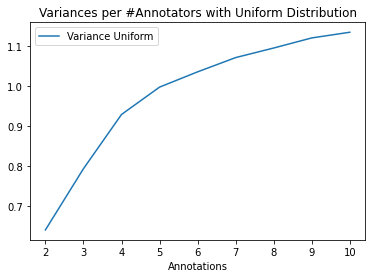

In [11]:
df = pd.DataFrame({'Annotations': num_annotators, 'Variance Uniform': var_of_annotators_uniform})
ax = df.plot.line(x='Annotations', title='Variances per #Annotators with Uniform Distribution')
plt.xticks(list(range(2, 11)))
plt.show()
plt.close()

mu = 0.6
x = np.arange(0, 5)
print(x)
print(poisson.pmf(x, mu))
print(sum(poisson.pmf(x, mu)))

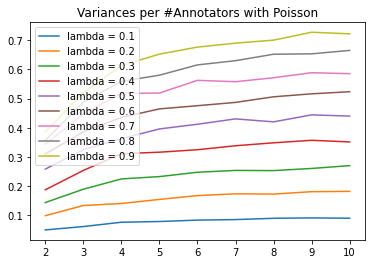

In [12]:
mus = list(np.arange(0.1, 1, 0.1))
x = np.arange(0, 4)

for mu in mus:
    p = poisson.pmf(x, mu)
    p[-1] += 1 - sum(p)
    var_of_annotators_poisson = []
    for annotators in num_annotators:
        _tmp_var = []
        for _ in range(sample_size):
            _tmp_var.append(np.var(np.random.choice(possible_samples, annotators, p=p)))
        var_of_annotators_poisson.append(np.mean(_tmp_var))
    plt.plot(num_annotators, var_of_annotators_poisson, label='lambda = {0:.1f}'.format(mu))
plt.legend()
plt.title('Variances per #Annotators with Poisson')
plt.show()
plt.close()